# Lab TEMA 1.2: Recordando estadísticas - Notebook

## MÓDULO 2: Aprendizaje automático de máquinas (machine learning)

### UNIDAD 1: Concepto de aprendizaje de máquinas

En este Ejercicio permite aplicar la teoría a programación python de los estadígrafos.

Puedes ejecutar cada una de las celdas de código haciendo click en ellas y presionando `Shift + Enter`. 

También puedes editar cualquiera de estas celdas. Las celdas no son independientes. Es decir, sí importa el orden en el que las ejecutes, y cualquier cambio que hagas se reflejará en las celdas que ejecutes después.

#### Cargamos las componentes a utilizar

In [ ]:
import numpy as np # importando numpy
from scipy import stats # importando scipy.stats
import pandas as pd # importando pandas

np.random.seed(2131982) # para poder replicar el random

In [ ]:
datos = np.random.randn(5, 4) # datos normalmente distribuidos
datos

#### Cálculos de Estadística descriptiva

In [ ]:
# media arítmetica
datos.mean() # Calcula la media aritmetica de

In [ ]:
np.mean(datos) # Mismo resultado desde la funcion de numpy

In [ ]:
datos.mean(axis=1) # media aritmetica de cada fila

In [ ]:
datos.mean(axis=0) # media aritmetica de cada columna

In [ ]:
np.median(datos) # Mediana

In [ ]:
np.median(datos, 0) # media aritmetica de cada columna

In [ ]:
np.std(datos)  # Desviación típica

In [ ]:
np.std(datos, 0) # Desviación típica de cada columna

In [ ]:
np.var(datos) # varianza

In [ ]:
np.var(datos, 0) # varianza de cada columna

In [ ]:
# moda
stats.mode(datos) # Calcula la moda de cada columna
# el 2do array devuelve la frecuencia.

In [ ]:
datos2 = np.array([1, 2, 3, 6, 6, 1, 2, 4, 2, 2, 6, 6, 8, 10, 6])
stats.mode(datos2) # la moda es el 6 porque aparece 5 veces en el vector.

In [ ]:
# correlacion
np.corrcoef(datos) # Creación matriz de correlación.

In [ ]:
np.corrcoef(datos[0], datos[1]) # calculando la correlación entre dos vectores.

In [ ]:
# covarianza
np.cov(datos) # calcula matriz de covarianza

In [ ]:
# covarianza de dos vectores
np.cov(datos[0], datos[1])

In [ ]:
#Datos del dataframe
datosdf = pd.DataFrame(datos)
datosdf

In [ ]:
#Graficar correlación
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

corr = datosdf.corr()
    
sns.set(rc={"font.style":"normal",
            "axes.titlesize":30,
           "text.color":"black",
            "xtick.color":"black",
            "ytick.color":"black",
            "axes.labelcolor":"black",
            "axes.grid":False,
            'axes.labelsize':30,
            'figure.figsize':(8.0, 8.0),
            'xtick.labelsize':20,
            'ytick.labelsize':20})
sns.heatmap(corr,annot = True, annot_kws={"size": 15},cmap="viridis")

plt.show()

In [ ]:
# usando pandas, creando dataframe
dataframe = pd.DataFrame(datos, index=['a', 'b', 'c', 'd', 'e'], 
                        columns=['col1', 'col2', 'col3', 'col4'])
dataframe

In [ ]:
# resumen estadistadistico con pandas
dataframe.describe()

In [ ]:
# sumando las columnas
dataframe.sum()

In [ ]:
# sumando filas
dataframe.sum(axis=1)

In [ ]:
# media aritmetica de cada columna con pandas
dataframe.mean()

In [ ]:
# media aritmetica de cada fila con pandas
dataframe.mean(axis=1)

In [ ]:
# media aritmetica de cada fila con pandas
dataframe.std()

In [ ]:
# media aritmetica de cada fila con pandas
dataframe.std(axis=1)

Gráficos, histogramas y Distribuciones
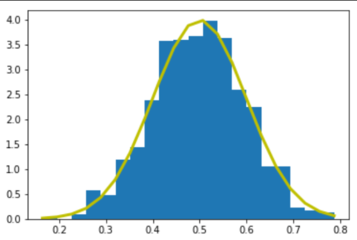

In [ ]:
# Graficos embebidos.
%matplotlib inline 

In [ ]:
import matplotlib.pyplot as plt # importando matplotlib
import seaborn as sns # importando seaborn

# parametros esteticos de seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

In [ ]:
mu, sigma = 0, 0.1 # media y desvio estandar
s = np.random.normal(mu, sigma, 1000) #creando muestra de datos
s

In [ ]:
# histograma de distribución normal.
cuenta, cajas, ignorar = plt.hist(s, 30, normed=True)
normal = plt.plot(cajas, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (cajas - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')

In [ ]:
# Dibujando la distribucion Gamma
x = stats.gamma(3).rvs(5000)
gamma = plt.hist(x, 70, histtype="stepfilled", alpha=.7)
x

In [ ]:
# Calculando la simetria con scipy
stats.skew(x)

Boxplot y cuartiles (https://seaborn.pydata.org/generated/seaborn.boxplot.html)

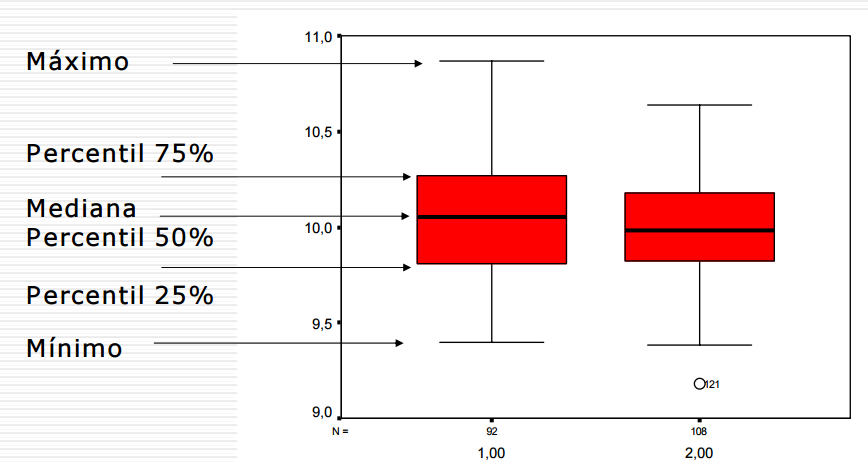

In [ ]:
# Ejemplo de grafico de cajas en python

datos_1 = np.random.normal(100, 10, 200)
datos_2 = np.random.normal(80, 30, 200)
datos_3 = np.random.normal(90, 20, 200)
datos_4 = np.random.normal(70, 25, 200)

datos_graf = [datos_1, datos_2, datos_3, datos_4]

# Creando el objeto figura
fig = plt.figure(1, figsize=(9, 6))

# Creando el subgrafico
ax = fig.add_subplot(111)

# creando el grafico de cajas
bp = ax.boxplot(datos_graf)

# visualizar mas facile los atípicos
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)
# los puntos aislados son valores atípicosFB

In [ ]:
# importanto la api de statsmodels
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Creando un DataFrame de pandas.
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/longley.csv', index_col=0)
df.head() # longley dataset


In [ ]:
# Muestreo aleatorio simple
aleat_8 = df.sample(n=10)
aleat_8

In [ ]:
# Repetimos el ejercicio y observamos que la selección aleatoria cambió
aleat_8_2 = df.sample(n=10)
aleat_8_2

In [ ]:
# Selección aleatoria del 25% de la tabla
prop_25 = df.sample(frac =.25)
prop_25.head()

In [ ]:
# Muestreo Sistemático
def systematic_sampling(econdata, step):
 
    indexes = np.arange(0, len(econdata), step=step)
    systematic_sample = econdata.iloc[indexes]
    return systematic_sample

systematic_sample = systematic_sampling(df, 3)

systematic_sample

In [ ]:
# Muestreo estratificado
df['estratificado'] = df['Year']
(df['estratificado'].value_counts() / len(df)).sort_values(ascending=False)

###### ***Curso: Machine Learning en la nube***
###### ***Autor: Marcelo Miranda Williams***